In [21]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("./pitayasmoothie.mplstyle")

In [22]:
# Training Set - Package Given to student with particular CGPA
training_set = pd.read_csv("./test.csv")
training_set.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [23]:
x_train = training_set["x"]
y_train = training_set["y"]

m = len(x_train)

print(f"Training Set size : {m}")

Training Set size : 300


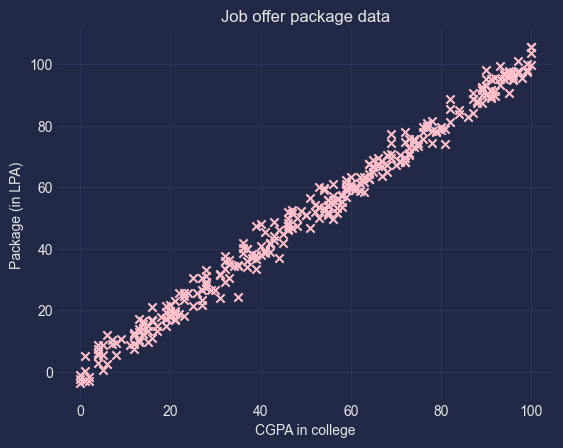

In [24]:
# Graphical representation of above data
plt.scatter(x_train, y_train, marker="x", c="pink")
plt.title("Job offer package data")
plt.xlabel("CGPA in college")
plt.ylabel("Package (in LPA)")
plt.show()

In [25]:
# Model -> f(x) = w*x + b
# where w and b are parameter

# Cost function J(x, b) = (1 / 2m) sum(square(y_prediction - y))

# we are going to use Gradient Decent Algorithm for finding minimum values os J(w, b)
# which leads us to best_fit w and b

# for finding w_new and b_new using Gradient Decent 
# alpha is learning rate

# w_new = w - alpha * dw_j(w, b)
# b_new = b - alpha * db_j(w, b)

# here dw_j is derivative d (j_w_b) / dw
# here db_j is derivative d (j_w_b) / db

# it turns out dw_j is 1 / m * sum((w*x + b - y) * x)
# it turns out dw_j is 1 / m * sum((w*x + b - y))

def dw_j(w, b):
    return (1 / m) * np.sum((w * x_train + b - y_train) * x_train)

def db_j(w, b):
    return (1 / m) * np.sum((w * x_train + b - y_train))

In [26]:
# Assuming w and b's initial values
w = 0
b = 0
alpha = 0.0001 # learning rate
precision = 0.000001 # going to converge until this many precision
# warning learning rate of 0.4 and big turns out to be very big, which in turn diverges thats why we get overflow error

In [27]:
# trying to converge w and b  until new and old have very less precision difference
while True:    
    w_new = w - alpha * dw_j(w, b)
    b_new = b - alpha * db_j(w, b)

    if math.isclose(w, w_new, abs_tol=precision) and math.isclose(b, b_new, abs_tol=precision):
        w = w_new
        b = b_new
        break

    w = w_new
    b = b_new

In [28]:
print(f"Best fit w: {w}")
print(f"Best fit b: {b}")

Best fit w: 1.0073672985218645
Best fit b: 0.003863730635833518


In [29]:
def f_w_b(x):
    return w * x + b

y_prediction = [f_w_b(i) for i in x_train]

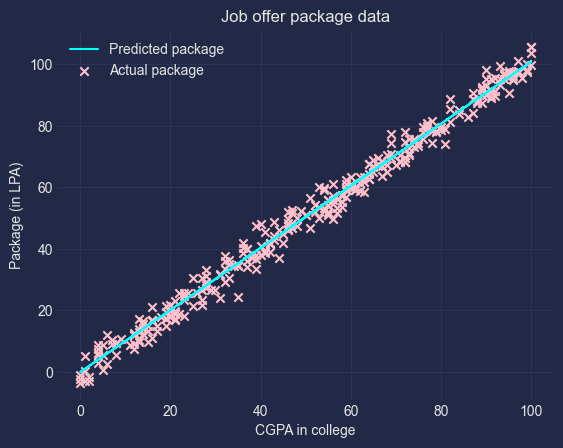

In [30]:
plt.plot(x_train, y_prediction, c="cyan", label="Predicted package")

plt.scatter(x_train, y_train, marker="x", c="pink", label="Actual package")
plt.title("Job offer package data")
plt.xlabel("CGPA in college")
plt.ylabel("Package (in LPA)")
plt.legend()
plt.show()